## Noise Loader

In [1]:
# import os
# import math

# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import random


# import tensorflow as tf
# import tensorflow_datasets as tfds
# import tensorflow_io as tfio
# from tensorflow import keras
# import tensorflow_probability as tfp 

# import librosa

from preprocessor import Preprocessor
from utils import wrapper_serialize, save_dataset, load_dataset

# tfd = tfp.distributions
# config = dict()
# config['verbose'] = 1
# AUTOTUNE = tf.data.AUTOTUNE

In [2]:
from IPython.display import Audio
%matplotlib notebook
%matplotlib inline
print(tf.__version__)

2.4.0


In [2]:
config = {}
config['data_root'] = 'gtzan'
config['noise_path'] = 'C:/Users/BOUBAW/tensorflow_datasets/fsd/meta/test_post_competition_scoring_clips.csv'
config['sample_rate'] = 22050
config['nfft'] = 512
config['window'] = 512
config['stride'] = 256
config['mels'] = 128
config['fmin_mels'] = 0
config['fmax_mels'] = 8000
config['time_mask'] = 10
config['freq_mask'] = 10
config['noise_threshold'] = 1 # add noise to only 0.3
config['beta'] = 0.5 # noise strength when mixing mel spectrograms
config['SNR'] = 5
config['noise_root'] = 'C:/Users/BOUBAW/tensorflow_datasets/fsd/1.0.0'
config['shuffle_batch_size'] = 64


config.update({'fade': 10000,
              'epsilon': 0.1,
              'roll_val': 15,
              'top_db': 80,
              'shift_val': 3,
              'bins_per_octave': 12,
              'param_db': 10,
              'train_size': 0.7,
              'val_size': 0.2,
              'test_size': 0.1,
              'noisy_samples': 5})


In [3]:
preprocessor = Preprocessor(config)
preprocessor.create_logger()
preprocessor.load_data()

In [4]:
preprocessor.offline_preprocessing(mode='test')
preprocessor.offline_preprocessing(mode='train')
preprocessor.offline_preprocessing(mode='val')
preprocessor.offline_preprocessing(mode='noise')

In [5]:
preprocessor.save_mels(skip=['train', 'val', 'noise'])

In [6]:
for i in preprocessor.test_dataset.as_numpy_iterator():
    print(i)
    break

{'audio': array([ 703, 1398, 1366, ...,  128,  216,  459], dtype=int64), 'audio/filename': b'jazz.00015.wav', 'label': 5, 'mel': array([[0.        , 0.        , 1.8772062 , ..., 0.6105055 , 0.79044044,
        0.78680867],
       [0.        , 0.        , 2.0143158 , ..., 0.5303731 , 0.7998804 ,
        0.93543667],
       [0.        , 0.        , 1.6220566 , ..., 0.67566717, 0.62394685,
        0.88204473],
       ...,
       [0.        , 0.        , 1.2467942 , ..., 0.41194117, 0.5515395 ,
        0.4465399 ],
       [0.        , 0.        , 0.66363734, ..., 0.3942058 , 0.593091  ,
        0.55643505],
       [0.        , 0.        , 0.75434965, ..., 0.17443489, 0.2902744 ,
        0.17100485]], dtype=float32)}


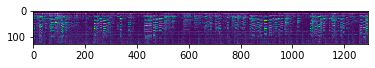

In [7]:
plt.imshow(i['mel'].T)

In [8]:
i['mel'].shape

(1293, 128)

In [8]:
ds = preprocessor.train_dataset

In [7]:
for i in ds.as_numpy_iterator():
    print(i.keys())
    break

dict_keys(['noise_wav', 'noise_label', 'rate', 'mel'])


In [11]:
from prep_utils import wrapper_dict2tensor

In [12]:
mels_ds = ds.map(lambda x: wrapper_dict2tensor(x, ['mel']))
labels_ds = ds.map(lambda x: wrapper_dict2tensor(x, ['label']))

In [13]:
def wrapper_serialize(x):
    return tf.py_function(tf.io.serialize_tensor, [x],
                          [tf.string])[0]

def save_dataset(ds, path):
    ds = ds.map(lambda x: wrapper_serialize(x))
    writer = tf.data.experimental.TFRecordWriter(path)
    try:
        writer.write(ds) 
    except tf.errors.NotFoundError:
        os.makedirs(os.path.dirname(path))
        writer.write(ds)
    return True
    
def load_dataset(path, dtype=tf.float32):
    ds_new = tf.data.TFRecordDataset(path)
    ds_new = ds_new.map(lambda x: tf.io.parse_tensor(x, dtype))
    return ds_new

In [27]:
save_dataset(mels_ds, './train/mels.record')
# save_dataset(labels_ds, './train/labels.record')

True

In [28]:
mels_ds_loaded = load_dataset('./train/mels.record', dtype=tf.float32)
# labels_ds_loaded = load_dataset('./noise/labels.record', dtype=tf.int32)

In [29]:
j = 0
for i in mels_ds_loaded.as_numpy_iterator():
#     print(i)
    j += 1
    
    
# for i in labels_ds_loaded.as_numpy_iterator():
#     print(i)
#     break

In [30]:
j

700

In [13]:
writer = tf.data.experimental.TFRecordWriter("./test")

In [14]:
writer.write(ds2)

In [15]:
ds_new = tf.data.TFRecordDataset("./test")
# ds_new = ds_new.map(lambda x: wrapper_p(x))
ds_new = ds_new.map(lambda x: tf.io.parse_tensor(x, tf.float32))


In [16]:
for i in ds_new.as_numpy_iterator():
    print(i)
    break

[[0.00000000e+00 0.00000000e+00 4.69227135e-01 ... 6.71112165e-03
  1.47279175e-02 1.05358800e-02]
 [0.00000000e+00 0.00000000e+00 1.71503440e-01 ... 1.69341285e-02
  1.58252083e-02 1.78858545e-02]
 [0.00000000e+00 0.00000000e+00 4.85182434e-01 ... 1.53596345e-02
  1.54495090e-02 2.96757761e-02]
 ...
 [0.00000000e+00 0.00000000e+00 3.92088085e-01 ... 4.74026846e-03
  7.94545654e-03 1.01028392e-02]
 [0.00000000e+00 0.00000000e+00 1.73598289e-01 ... 1.03289960e-02
  8.31493083e-03 8.06838553e-03]
 [0.00000000e+00 0.00000000e+00 1.22220931e-03 ... 3.49336740e-04
  3.46877583e-04 3.38119717e-04]]


In [17]:
i.shape

(87, 128)

In [57]:
for x in ds_new.take(1).as_numpy_iterator():
    print(x)

[[0.         0.         1.163298   ... 0.41527095 0.34068093 0.33675712]
 [0.         0.         0.93864655 ... 0.7837465  0.75046015 0.39800027]
 [0.         0.         0.64102185 ... 0.7512986  0.582277   0.2643117 ]
 ...
 [0.         0.         0.748868   ... 0.08565366 0.085899   0.05103704]
 [0.         0.         1.0179516  ... 0.7149303  0.9492889  0.5286459 ]
 [0.         0.         0.07520003 ... 0.0267926  0.02634441 0.0243704 ]]


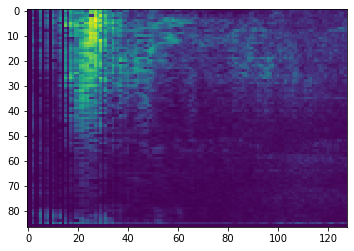

In [58]:
plt.imshow(x)

In [60]:
for x in ds.take(1).as_numpy_iterator():
    print(x['mel'])

[[0.         0.         1.163298   ... 0.41527095 0.34068093 0.33675712]
 [0.         0.         0.93864655 ... 0.7837465  0.75046015 0.39800027]
 [0.         0.         0.64102185 ... 0.7512986  0.582277   0.2643117 ]
 ...
 [0.         0.         0.748868   ... 0.08565366 0.08589901 0.05103704]
 [0.         0.         1.0179516  ... 0.7149303  0.9492889  0.5286458 ]
 [0.         0.         0.07520003 ... 0.0267926  0.02634441 0.0243704 ]]


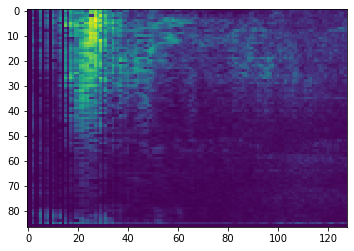

In [63]:
plt.imshow(x['mel'])

In [62]:
x

{'noise_wav': array([0.2124939 , 0.23370361, 0.26989746, ..., 0.29058838, 0.27593994,
        0.284729  ], dtype=float32),
 'noise_label': 0,
 'rate': 22050,
 'mel': array([[0.        , 0.        , 1.163298  , ..., 0.41527095, 0.34068093,
         0.33675712],
        [0.        , 0.        , 0.93864655, ..., 0.7837465 , 0.75046015,
         0.39800027],
        [0.        , 0.        , 0.64102185, ..., 0.7512986 , 0.582277  ,
         0.2643117 ],
        ...,
        [0.        , 0.        , 0.748868  , ..., 0.08565366, 0.08589901,
         0.05103704],
        [0.        , 0.        , 1.0179516 , ..., 0.7149303 , 0.9492889 ,
         0.5286458 ],
        [0.        , 0.        , 0.07520003, ..., 0.0267926 , 0.02634441,
         0.0243704 ]], dtype=float32)}

In [97]:
def serialize_example(feature0, feature1, feature2, feature3):
  """
  Creates a tf.train.Example message ready to be written to a file.
  """
  # Create a dictionary mapping the feature name to the tf.train.Example-compatible
  # data type.
  feature = {
      'feature0': _int64_feature(feature0),
      'feature1': _int64_feature(feature1),
      'feature2': _bytes_feature(feature2),
      'feature3': _float_feature(feature3),
  }

  # Create a Features message using tf.train.Example.

  example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
  return example_proto.SerializeToString()

In [18]:
def serialize_ds(x):
    tmp = tf.train.Example(tf.train.Features(x))
    return tmp.SerializeToString()

In [19]:
ds3 = ds.map(lambda x: serialize_ds(x))

TypeError: in user code:

    <ipython-input-19-028066bef6bd>:1 None  *
        lambda x: serialize_ds(x))
    <ipython-input-18-9f231713fa80>:2 serialize_ds  *
        tmp = tf.train.Example(tf.train.Features(x))

    TypeError: No positional arguments allowed


In [ ]:
!pip install --upgrade tensorflow==2.4.1